In [1]:
import src as typy
from joblib import Parallel, delayed
from multiprocessing import cpu_count
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.ndimage import gaussian_filter1d
import pandas as pd
from matplotlib.patches import RegularPolygon

In [2]:
plt.style.use('seaborn-v0_8-bright')
from cycler import cycler
color=['blue','green','red','orange','cyan','darkviolet','brown','deeppink','lime']
default_cycler = (cycler(color=color))
plt.rc('axes', prop_cycle=default_cycler)

In [3]:
k_mesh = typy.model.mesh_crystal(N=500,dimension=2)

In [4]:
x,y = k_mesh

In [5]:
outdir= "./Results"
sigmas = os.listdir(outdir)

In [6]:
data = typy.reads.read_epc(path=f"{outdir}/{sigmas[0]}")

In [7]:
meta,e_k,e_kq,ph,g_kq = data
model = typy.epc.model(e_k,e_kq,ph=np.zeros(shape=(meta.nph,meta.nq)),g=g_kq)

In [9]:
abs = (g_kq*g_kq.conj()).real

In [11]:
sp = np.argmin(ph[1][100:200])+100

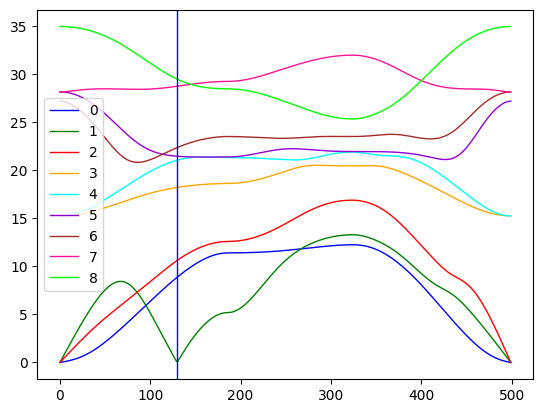

In [12]:
for i in range(9):
    plt.plot(ph[i],lw=1,label=i)
# plt.axis('equal')
plt.legend()
plt.axvline(sp,lw=1)
plt.show()

In [13]:
selfen_matrix  = model.calculate('selfen_matrix')


In [14]:
selfen = -np.rollaxis(np.array(selfen_matrix),0,3)

In [15]:
bp = np.argmax(selfen[1][1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


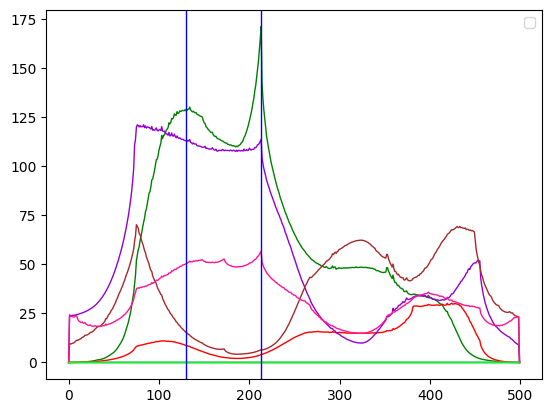

In [16]:
for i in range(9):
    plt.plot(selfen[i][i].real,lw=1)
plt.legend()
plt.axvline(sp,lw=1)
plt.axvline(bp,lw=1)
plt.show()

In [21]:
df = pd.DataFrame()
df['x']=x
df['y']=y
df['z']=e_k
df = df.query("-0.01 <= z  <= 0.01")

In [24]:
ss = -model.suscep_point(sp).real
bs = -model.suscep_point(bp).real

se =  -model.selfen_point(sp).real
be =  -model.selfen_point(bp).real

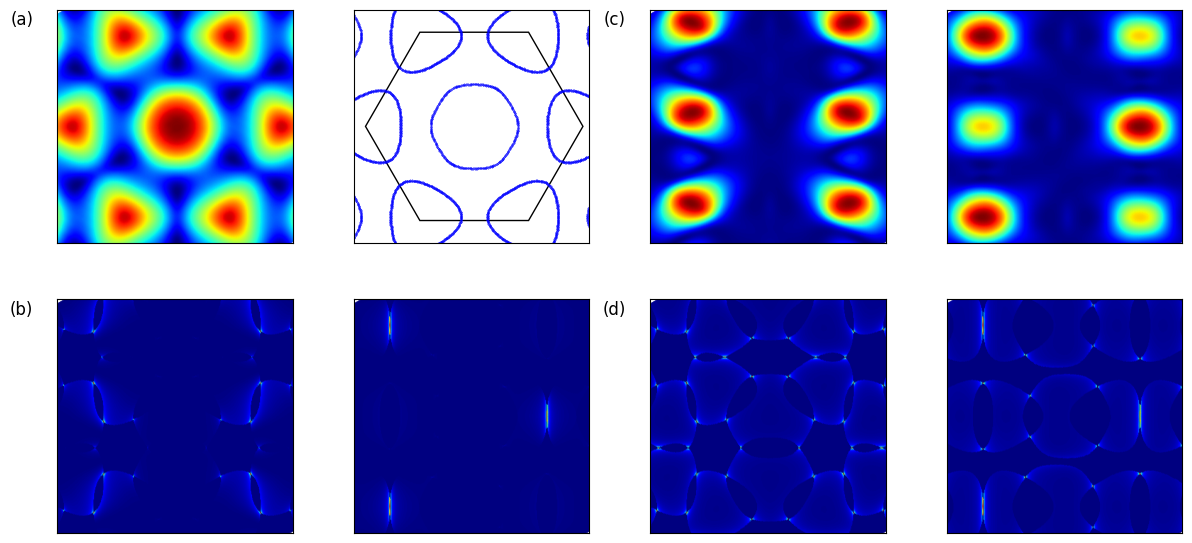

In [102]:
#Untangled band
# fig = plt.figure(figsize=(4,8))
fig, axs = plt.subplots(2,4,figsize=(12,6))
fig.tight_layout(pad=1,h_pad=0.5)


axs[0][0].scatter(x,y,c=e_k,cmap='jet',s=0.08)
axs[0][0].set_xlim(0.1,0.75)
axs[0][0].set_ylim(0.427,1.072)
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
# axs[0][0].colorbar()
axs[0][0].set_title('(a)', x=-0.15,y=0.9)
axs[0][0].set_aspect('equal')



hexagon = RegularPolygon((0.433012, 0.75), numVertices=6, radius=0.3, facecolor='w',edgecolor='black',orientation=np.pi*3/2)
axs[0][1].add_patch(hexagon)


# Set the aspect of the axes to be equal
axs[0][1].set_aspect('equal')



axs[0][1].scatter(df.x,df.y,s=0.08)
axs[0][1].set_xlim(0.1,0.75)
axs[0][1].set_ylim(0.427,1.072)
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])




axs[1][0].scatter(x,y,c=np.where(ss < 0.1,ss, 0.1)*abs[1][sp],cmap='jet',s=0.08)
axs[1][0].set_xlim(0.1,0.75)
axs[1][0].set_ylim(0.427,1.072)
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].set_title('(b)', x=-0.15,y=0.9)
axs[1][0].set_aspect('equal')


axs[1][1].scatter(x,y,c=np.where(bs < 0.1,bs, 0.1)*abs[1][bp],cmap='jet',s=0.08)
axs[1][1].set_xlim(0.1,0.75)
axs[1][1].set_ylim(0.427,1.072)
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_aspect('equal')


axs[0][2].scatter(x,y,c=abs[1][sp],cmap='jet',s=0.08)
axs[0][2].set_xlim(0.1,0.75)
axs[0][2].set_ylim(0.427,1.072)
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])
axs[0][2].set_title('(c)', x=-0.15,y=0.9)
axs[0][2].set_aspect('equal')


axs[0][3].scatter(x,y,c=abs[1][bp],cmap='jet',s=0.08)
axs[0][3].set_xlim(0.1,0.75)
axs[0][3].set_ylim(0.427,1.072)
axs[0][3].set_xticks([])
axs[0][3].set_yticks([])
axs[0][3].set_aspect('equal')


axs[1][2].scatter(x,y,c=np.where(ss < 0.1,ss, 0.1),cmap='jet',s=0.08)
axs[1][2].set_xlim(0.1,0.75)
axs[1][2].set_ylim(0.427,1.072)
axs[1][2].set_xticks([])
axs[1][2].set_yticks([])
axs[1][2].set_title('(d)', x=-0.15,y=0.9)
axs[1][2].set_aspect('equal')



axs[1][3].scatter(x,y,c=np.where(bs < 0.1,bs, 0.1),cmap='jet',s=0.08)
axs[1][3].set_xlim(0.1,0.75)
axs[1][3].set_ylim(0.427,1.072)
axs[1][3].set_xticks([])
axs[1][3].set_yticks([])
axs[1][3].set_aspect('equal')

plt.savefig("deconv.png")
plt.show()